# Check the stationarity of the time-series using ADF test
### Augumented-Dickey Fuller Test tells us whether a time series is stationary or not. If time series is not stationary, we can make it so by differencing it.

#### Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from datetime import datetime

#### Import Data

In [4]:
df = pd.read_csv('/home/naveksha/Project Work/Data/BiDailyAvgGB.csv', index_col='time', header=0)

#### Apply ADF test

In [5]:
series = df.bytes
series.index = series.index.map(lambda x: datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
X = series.values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.739895
p-value: 0.067386
Critical Values:
	10%: -2.569
	5%: -2.866
	1%: -3.440


#### If the p-value is less than 0.05, we have a significant result, and hence if ADF Statistic is greater than critical value, series is non-stationary.
#### We diffrence the time series and visualize it.

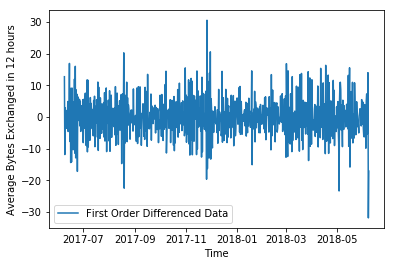

In [6]:
diff_ = series.diff()
diff__=diff_

plt.plot(diff_, label = 'First Order Differenced Data')
plt.xlabel('Time')
plt.ylabel('Average Bytes Exchanged in 12 hours')
plt.legend()
plt.show()

####  Check the stationarity of differenced data

In [7]:
diff_ = diff_.dropna()
Y = diff_.values
result = adfuller(Y)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -9.409913
p-value: 0.000000
Critical Values:
	10%: -2.569
	5%: -2.866
	1%: -3.440


#### If the series has become stationary then no need to difference it further, otherwise repeat the same steps.

In [ ]:
diff_.to_csv('DifferentBiDailyAvg.csv')